<a href="https://colab.research.google.com/github/lizathulya/Machine-Learning/blob/main/Predictive_Analysis_of_Meterlogical_events.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing necessary libraries
import pandas as pd# For data manipulation and processing, including handling CSV files
from sklearn.model_selection import train_test_split# For splitting data into training and testing sets
from sklearn.ensemble import RandomForestRegressor# For implementing the Random Forest regression model
from sklearn.metrics import mean_squared_error, r2_score# For evaluating model performance
import matplotlib.pyplot as plt # For creating static, interactive, and animated visualizations
import seaborn as sns # For attractive and informative statistical graphics
import numpy as np  # For linear algebra operations (e.g., working with arrays)
from sklearn.tree import plot_tree# Importing for tree visualization


In [ ]:
# Load the dataset
df = pd.read_csv(r"/content/Clean_Data.csv")

In [ ]:
# remove spaces on the column
df.columns = df.columns.str.lstrip()
df.columns = df.columns.str.rstrip()

In [ ]:
# print out sample dataset
# - `df.head()`: Shows the first 5 rows of the DataFrame by default.
#   This is useful for quickly inspecting the structure, column names, and sample data.
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35879 entries, 0 to 35878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       35878 non-null  object 
 1   Location_Name                 35878 non-null  object 
 2   Latitude                      35878 non-null  float64
 3   Longitude                     35878 non-null  float64
 4   Timezone                      35878 non-null  object 
 5   Last_Updated_Epoch            35878 non-null  float64
 6   Last_Updated                  35878 non-null  object 
 7   Temperature_Celsius           35879 non-null  float64
 8   Temperature_Fahrenheit        35878 non-null  float64
 9   Wind_MPH                      35878 non-null  float64
 10  Wind_KPH                      35878 non-null  float64
 11  Wind_Degree                   35878 non-null  float64
 12  Wind_Direction                35878 non-null  object 
 13  P

,Country,Location_Name,Latitude,Longitude,Timezone,Last_Updated_Epoch,Last_Updated,Temperature_Celsius,Temperature_Fahrenheit,Wind_MPH,...,Air_Quality_PM2.5,Air_Quality_PM10,Air_Quality_US-Epa-Index,Air_Quality_Gb-Defra-Index,Sunrise,Sunset,Moonrise,Moonset,Moon_Phase,Moon_Illumination
0,Afghanistan,Kabul,34.52,69.18,Asia/Kabul,1.715849e+09,5/16/2024 13:15,26.6,79.8,8.3,...,8.4,26.6,1.0,1.0,1/0/1900 4:50,1/0/1900 18:50,1/0/1900 12:12,1:11 AM,Waxing Gibbous,55.0
1,Afghanistan,Kabul,34.52,69.18,Asia/Kabul,1.715868e+09,5/16/2024 18:30,22.0,71.6,4.5,...,9.4,18.9,1.0,1.0,1/0/1900 4:50,1/0/1900 18:50,1/0/1900 12:12,1:11 AM,Waxing Gibbous,55.0
2,Afghanistan,Kabul,34.52,69.18,Asia/Kabul,1.715962e+09,5/17/2024 20:30,15.0,58.9,3.4,...,8.3,18.1,1.0,1.0,1/0/1900 4:49,1/0/1900 18:51,1/0/1900 13:09,1:37 AM,Waxing Gibbous,64.0
3,Afghanistan,Kabul,34.52,69.18,Asia/Kabul,1.716043e+09,5/18/2024 19:00,19.5,67.1,2.2,...,7.5,15.3,1.0,1.0,1/0/1900 4:48,1/0/1900 18:51,1/0/1900 14:04,2:00 AM,Waxing Gibbous,73.0
4,Afghanistan,Kabul,34.52,69.18,Asia/Kabul,1.716127e+09,5/19/2024 18:30,16.9,62.4,4.0,...,4.8,10.1,1.0,1.0,1/0/1900 4:48,1/0/1900 18:52,1/0/1900 15:00,2:22 AM,Waxing Gibbous,81.0


In [ ]:
# Count unique rows without showing their frequencies
unique_rows_count = len(df.drop_duplicates())

# Display the count of unique rows
print(unique_rows_count)

35879


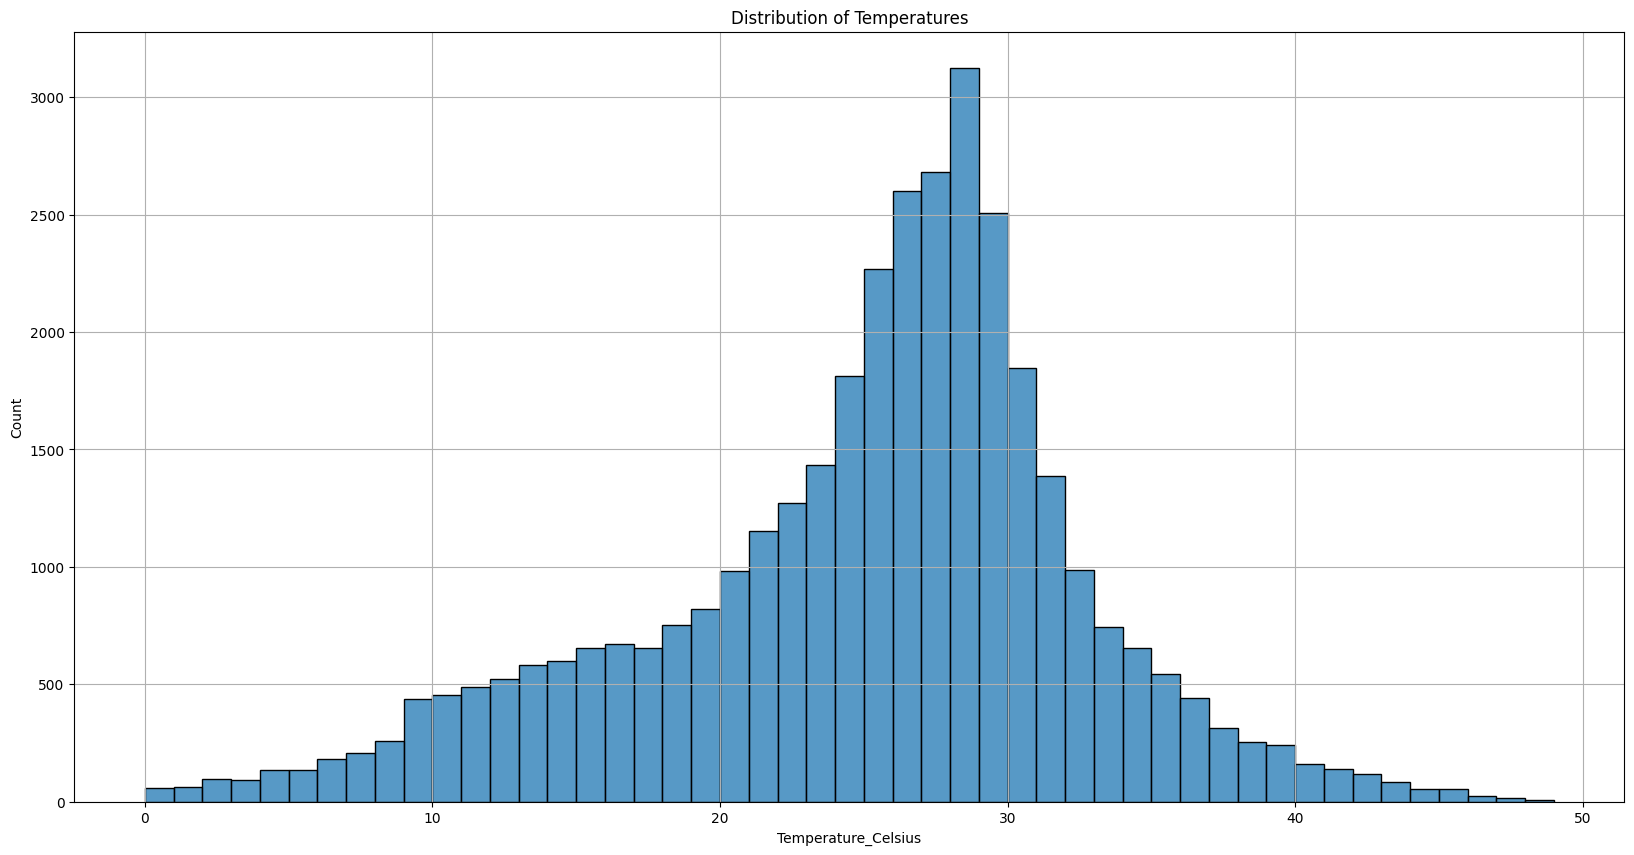

In [ ]:
# Create a figure for plotting with specified size
plt.figure(figsize=(20, 10))
# Plot a histogram of the '_tempm' column with specified bins
sns.histplot(df['Temperature_Celsius'], bins=[i for i in range(0, 50, 1)], kde=False)
# Add a title to the plot
plt.title("Distribution of Temperatures")
# Enable grid on the plot for better readability
plt.grid()
# Display the plot
plt.show()

In [ ]:
# Select features for prediction
features = ['Latitude', 'Longitude', 'Wind_MPH', 'Pressure_MB', 'Humidity',
           'Cloud', 'Visibility_KM', 'UV_Index', 'Air_Quality_PM2.5']
target = 'Temperature_Celsius'
X = df[features]
y = df[target]

In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=42)

# Train Random Forest model
rf_model = RandomForestRegressor(n_estimators=1000, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1000, random_state=42)

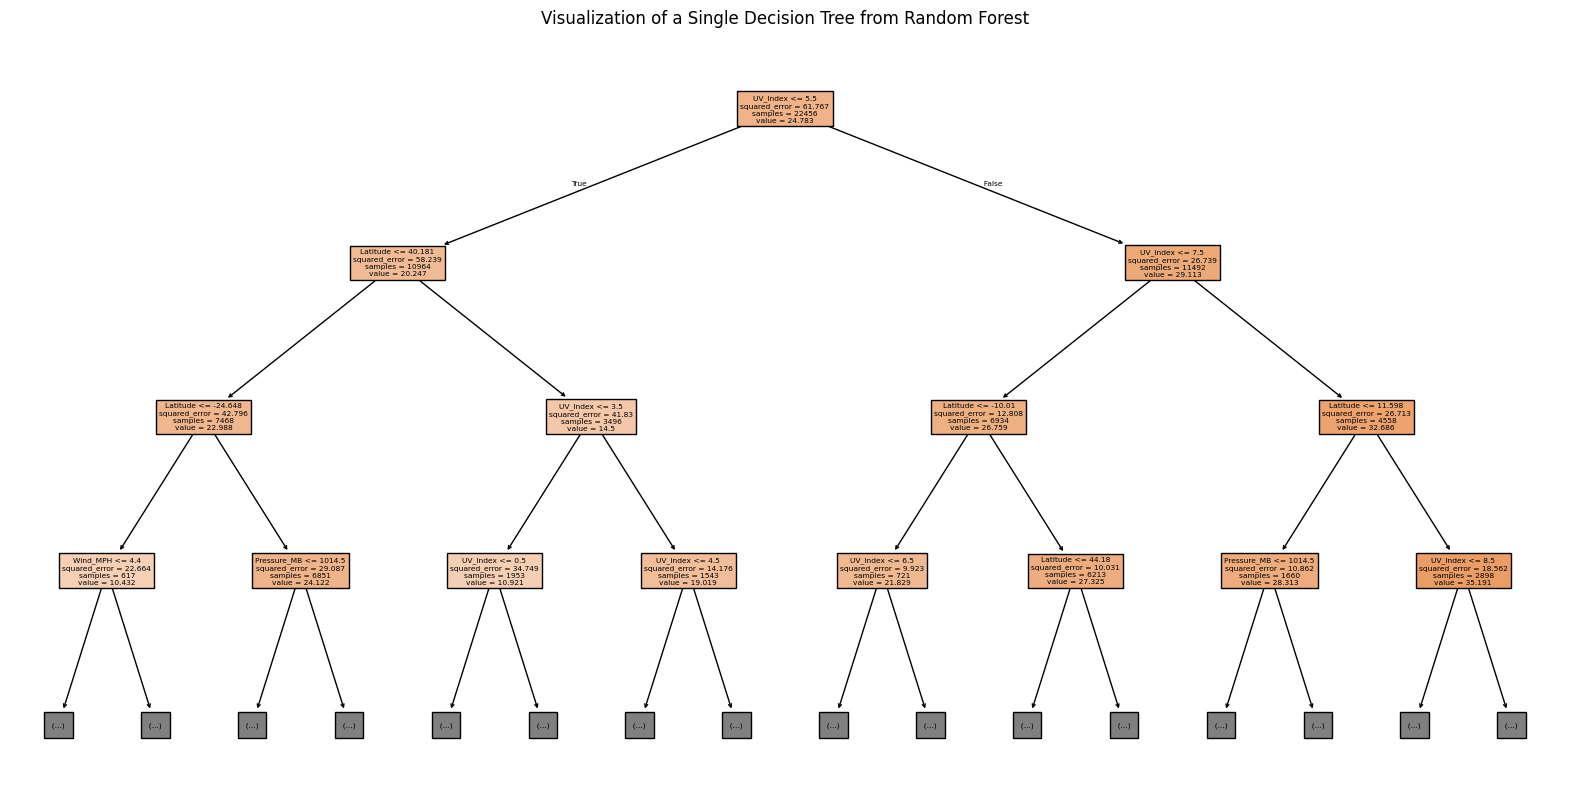

In [ ]:
plt.figure(figsize=(20,10))
plot_tree(rf_model.estimators_[0], feature_names=features, filled=True, max_depth=3)
plt.title('Visualization of a Single Decision Tree from Random Forest')
plt.show()

In [ ]:
# Make predictions
y_pred = rf_model.predict(X_test)

In [ ]:
# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print('Random Forest Model Performance:')
print('Root Mean Square Error:', round(rmse, 2))
print('R-squared Score:', round(r2, 2))

Random Forest Model Performance:
Root Mean Square Error: 2.1
R-squared Score: 0.93


In [ ]:
# Generate a detailed table of actual vs predicted values
predictions_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'Residual': y_test - y_pred
})
predictions_df.head()

,Actual,Predicted,Residual
5345,4.1,5.4197,-1.3197
273,37.1,35.4039,1.6961
7010,11.9,13.3992,-1.4992
12564,20.3,20.1687,0.1313
11076,18.0,18.6542,-0.6542


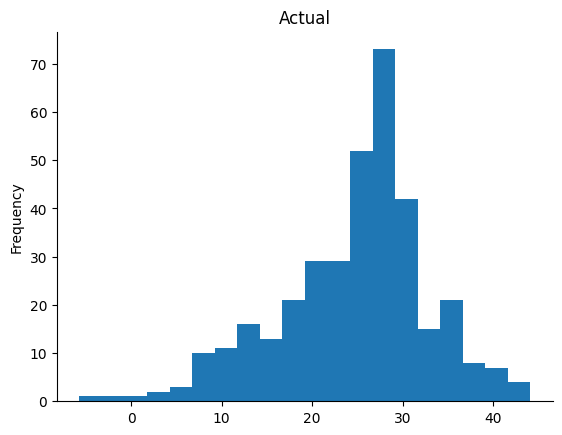

In [ ]:
# Actual Temperature

from matplotlib import pyplot as plt
predictions_df['Actual'].plot(kind='hist', bins=20, title='Actual')
plt.gca().spines[['top', 'right',]].set_visible(False)

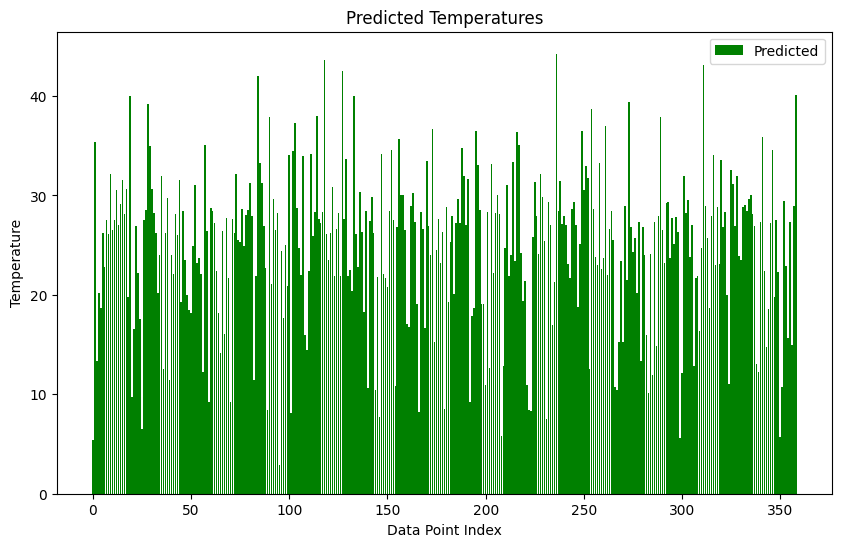

In [ ]:
# Plotting the predicted values as green bars
plt.figure(figsize=(10, 6))
plt.bar(range(len(y_pred)), y_pred, color='green', label='Predicted')
plt.xlabel('Data Point Index')
plt.ylabel('Temperature')
plt.title('Predicted Temperatures')
plt.legend()
plt.show()

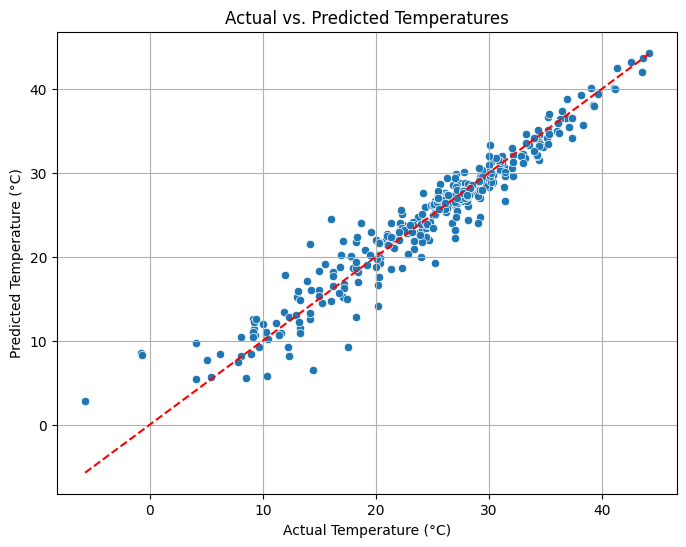

In [ ]:
# scatter plot compares predicted temperature values to the actual values. Points closer to the 45-degree diagonal indicate accurate predictions. This visualization provides a quick visual assessment of model accuracy.
# Create the scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Add a 45-degree line
plt.xlabel('Actual Temperature (°C)')
plt.ylabel('Predicted Temperature (°C)')
plt.title('Actual vs. Predicted Temperatures')
plt.grid(True)
plt.show()

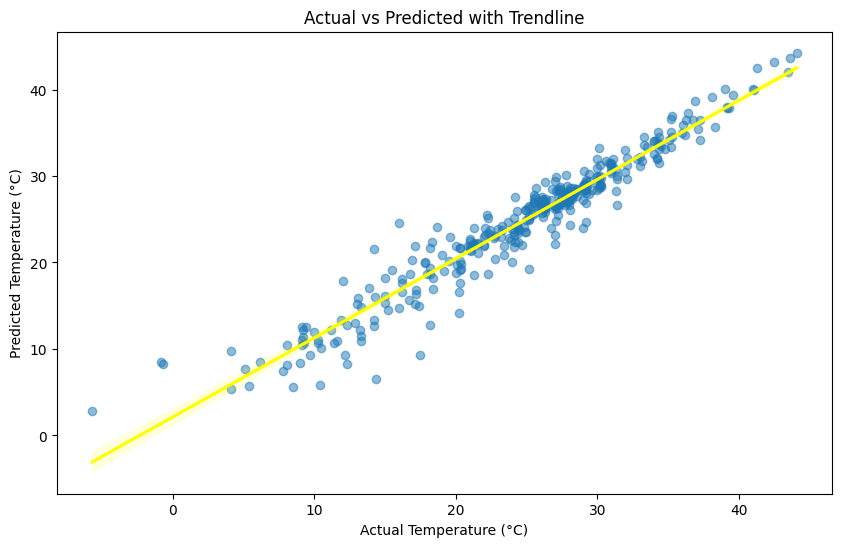

In [ ]:
# Scatter plot of Actual vs Predicted with a trendline
plt.figure(figsize=(10, 6))
sns.regplot(x=predictions_df['Actual'], y=predictions_df['Predicted'], scatter_kws={'alpha':0.5}, line_kws={'color': 'yellow'})
plt.xlabel('Actual Temperature (°C)')
plt.ylabel('Predicted Temperature (°C)')
plt.title('Actual vs Predicted with Trendline')
plt.show()

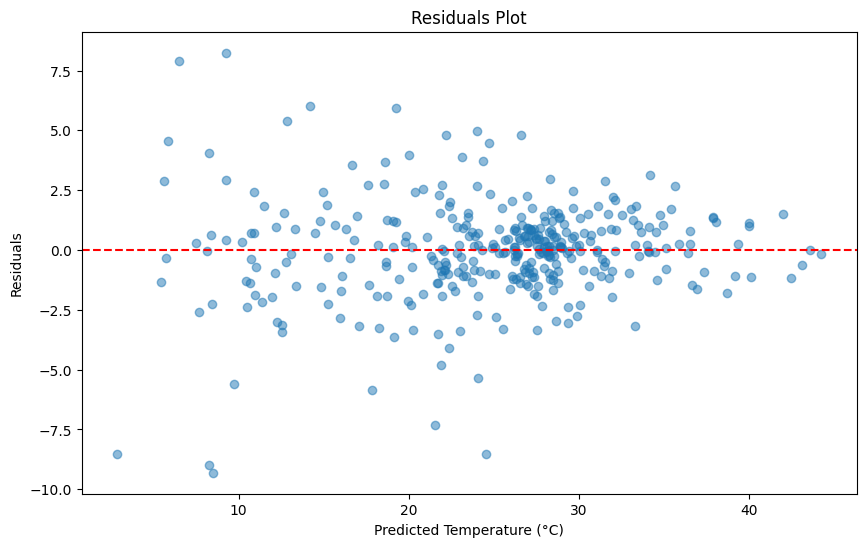

In [ ]:
# Residuals Plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.xlabel('Predicted Temperature (°C)')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals Plot')
plt.show()

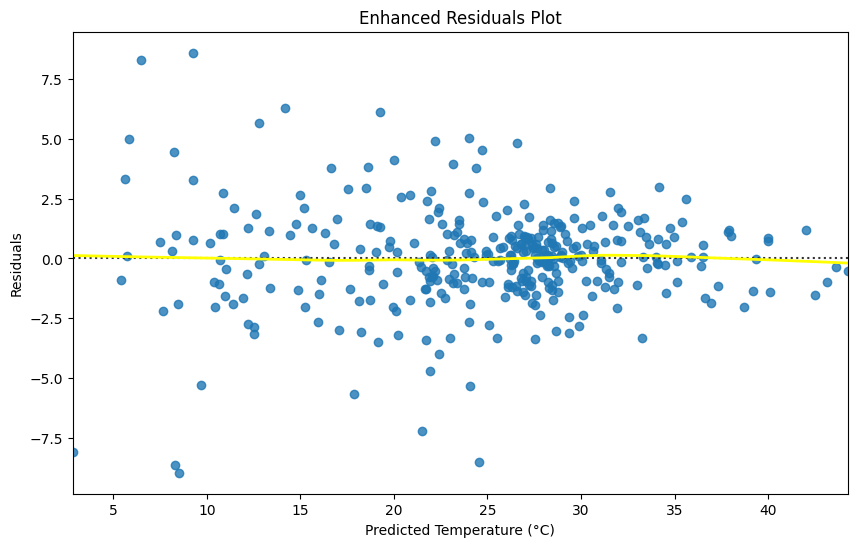

In [ ]:
# Enhanced Residual Plot
plt.figure(figsize=(10, 6))
sns.residplot(x=y_pred, y=y_test, lowess=True, line_kws={'color': 'yellow', 'lw': 2})
plt.xlabel('Predicted Temperature (°C)')
plt.ylabel('Residuals')
plt.title('Enhanced Residuals Plot')
plt.show()

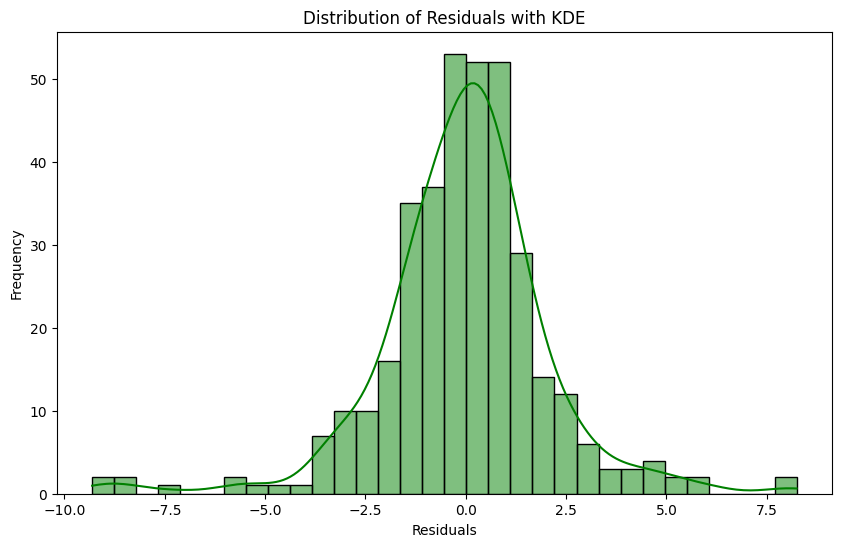

In [ ]:
#Distribution of Residuals with KDE
plt.figure(figsize=(10, 6))
sns.histplot(predictions_df['Residual'], kde=True, color='green')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals with KDE')
plt.show()

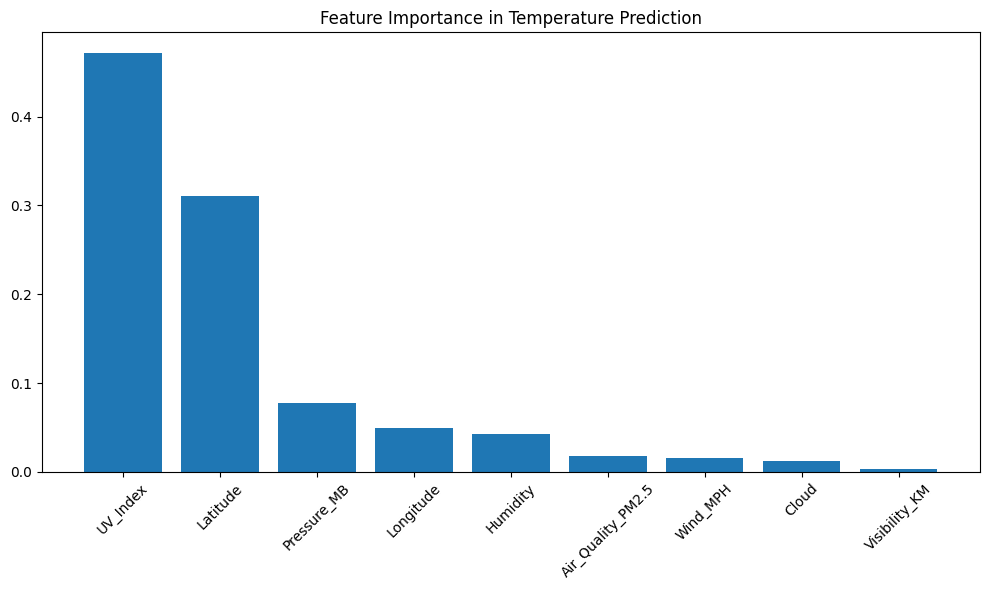

In [ ]:
# Feature importance
feature_importance = pd.DataFrame({
    'Feature': features,
    'Importance': rf_model.feature_importances_
})
feature_importance = feature_importance.sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(feature_importance['Feature'], feature_importance['Importance'])
plt.xticks(rotation=45)
plt.title('Feature Importance in Temperature Prediction')
plt.tight_layout()
plt.show()